In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [3]:
np.random.seed(42)

In [4]:
digits = load_digits()
data = scale(digits.data)

In [6]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [7]:
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ..., 
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [8]:
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

In [20]:
print("\n n_samples : %d\n n_features : %d\n n_digits : %d\n" % (n_samples, n_features, n_digits))


 n_samples : 1797
 n_features : 64
 n_digits : 10



In [17]:
sample_size = 300

In [32]:

def bench_k_means(estimator, name, data):
    print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhoutte')

    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
         % (name, (time()-t0), estimator.inertia_, 
           metrics.homogeneity_score(labels, estimator.labels_),
           metrics.completeness_score(labels, estimator.labels_),
           metrics.v_measure_score(labels, estimator.labels_),
           metrics.adjusted_rand_score(labels, estimator.labels_),
            metrics.adjusted_mutual_info_score(labels, estimator.labels_),
            metrics.silhouette_score(data, estimator.labels_, metric='euclidean', sample_size=sample_size)))
    


           

In [33]:
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
             name="k-means++", data=data)

init		time	inertia	homo	compl	v-meas	ARI	AMI	silhoutte
k-means++	0.33s	69683	0.672	0.714	0.692	0.555	0.669	0.162


In [34]:
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
             name='random', data=data)

init		time	inertia	homo	compl	v-meas	ARI	AMI	silhoutte
random   	0.32s	69676	0.671	0.713	0.691	0.554	0.668	0.129


In [35]:
pca = PCA(n_components = n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based", data=data)


init		time	inertia	homo	compl	v-meas	ARI	AMI	silhoutte
PCA-based	0.05s	70793	0.667	0.695	0.681	0.553	0.663	0.138


In [36]:
#Visualization

In [37]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
print(reduced_data[:])

[[ 1.91425284 -0.95438513]
 [ 0.58895587  0.92456005]
 [ 1.30205305 -0.31711592]
 ..., 
 [ 1.0226074  -0.14783027]
 [ 1.07605408 -0.38090052]
 [-1.25765805 -2.22745499]]


In [44]:
print(reduced_data[:, 0])

[ 1.91425284  0.58895587  1.30205305 ...,  1.0226074   1.07605408
 -1.25765805]


In [45]:
h=.02

In [46]:
x_min, x_max = reduced_data[:, 0].min()-1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min()-1, reduced_data[:, 0].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [47]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

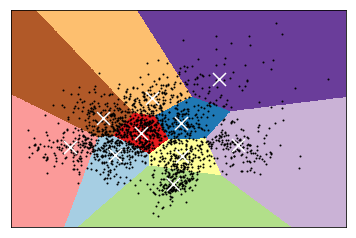

In [48]:
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation = 'nearest',
          extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.Paired,
          aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s=169, linewidths=3, color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()